## House Prices: Advanced Regression Techniques


#### Description: Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style("dark")
#sns.set_palette("RdBu")
sns.set_palette("bright")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [25]:
dt = pd.read_csv("train.csv")

In [26]:
dt.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
dt.info()
dt.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### General information about SalePrice

In [73]:
dt['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

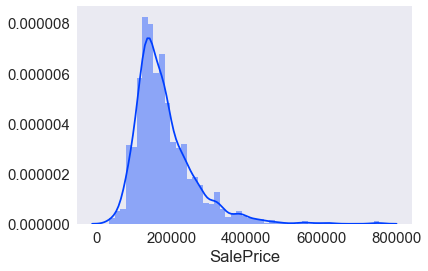

In [74]:
sns.distplot(dt['SalePrice'])

Current distplot:
* Deviate from the normal distribution.
* Have appreciable positive skewness.
* Show peakedness.


### Let's check how SalePrice depends on MSZoning,OverallQual, YearBuilt, TotalBsmtSF,  GrLiveArea

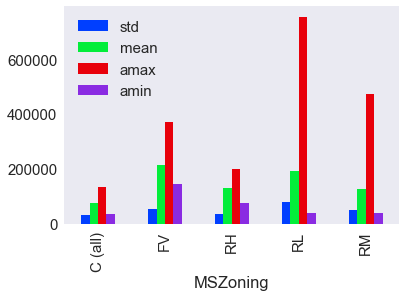

In [59]:
dt.groupby(['MSZoning'])['SalePrice'].agg([np.std, np.mean, np.max, np.min]).plot(kind='bar')

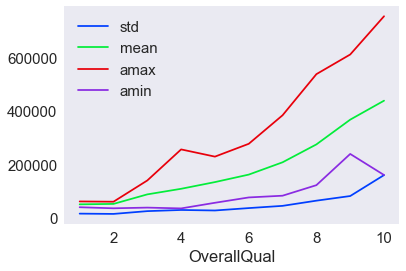

In [60]:
dt.groupby(['OverallQual'])['SalePrice'].agg([np.std, np.mean, np.max, np.min]).plot()

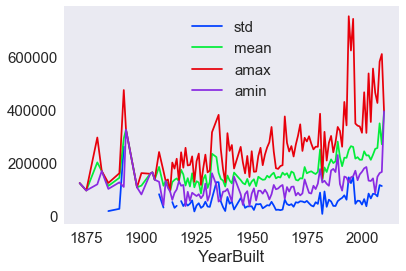

In [61]:
dt.groupby(['YearBuilt'])['SalePrice'].agg([np.std, np.mean, np.max, np.min]).plot()

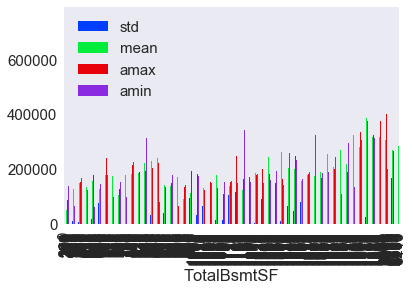

In [67]:
dt.groupby(['TotalBsmtSF'])['SalePrice'].agg([np.std, np.mean, np.max, np.min]).plot(kind='bar')

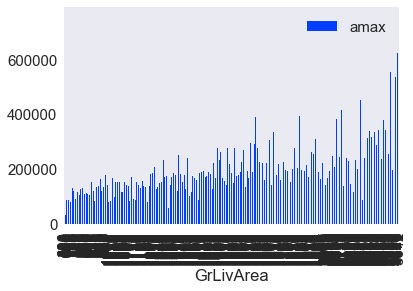

In [70]:
dt.groupby(['GrLivArea'])['SalePrice'].agg([np.max]).plot(kind='bar')

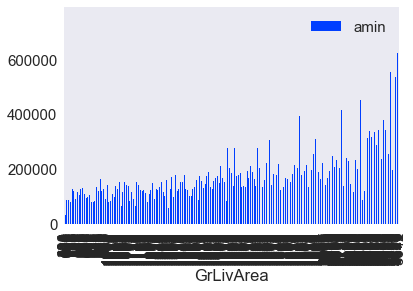

In [71]:
dt.groupby(['GrLivArea'])['SalePrice'].agg([np.min]).plot(kind='bar')

### Let's check releations between features

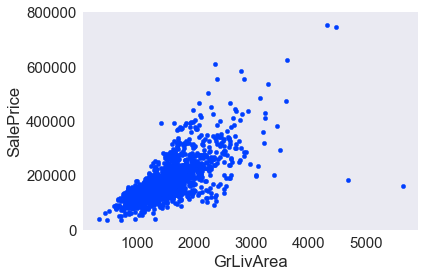

In [75]:
data = pd.concat([dt['SalePrice'], dt['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

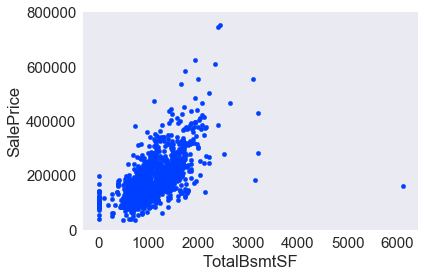

In [76]:
data = pd.concat([dt['SalePrice'], dt['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

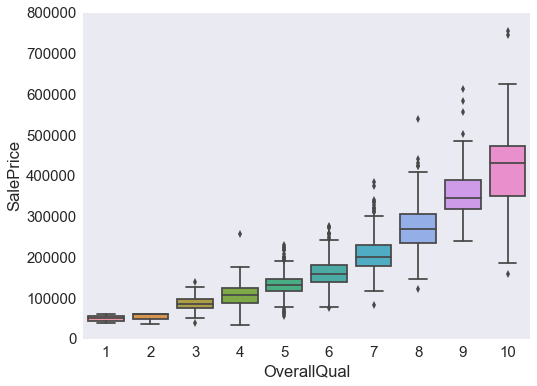

In [77]:
data = pd.concat([dt['SalePrice'], dt['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

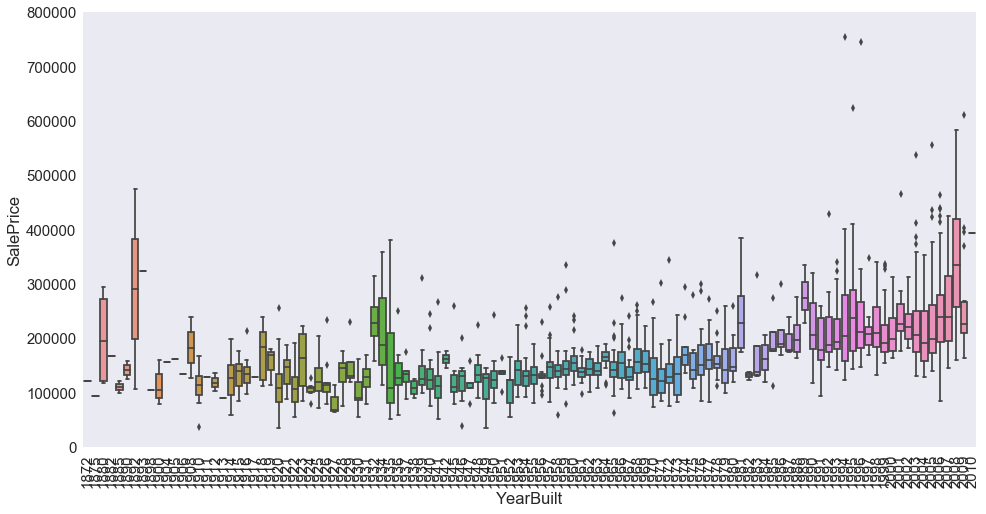

In [78]:
data = pd.concat([dt['SalePrice'], dt['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'.
* 'OverallQual' seems to have the strongest relation to 'SalePrice'
* 'YearBuilt' also contributes to the price.


### Let's check the correlation matrix.

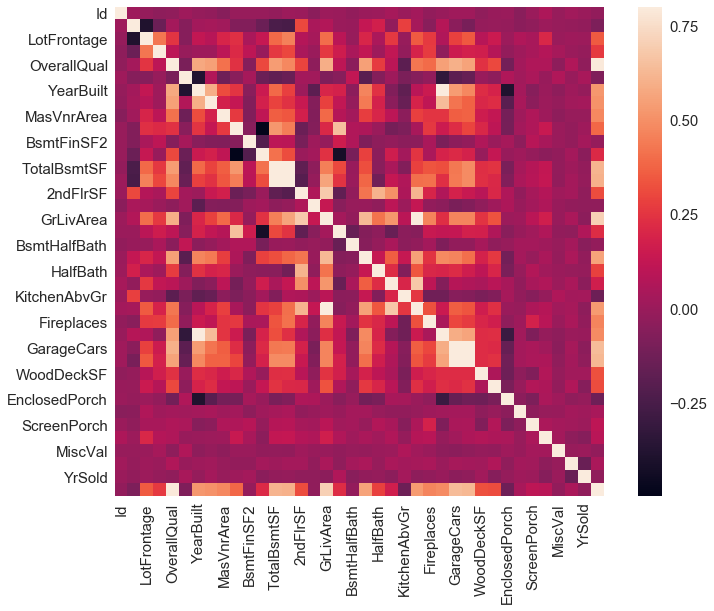

In [79]:
corrmat = dt.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

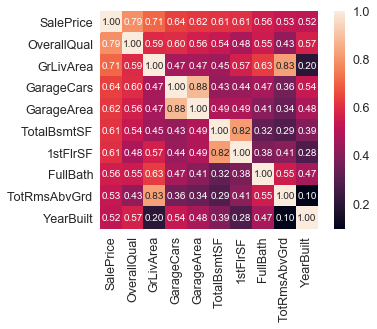

In [80]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dt[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice
* YearBuilt is not correlated with SalePrice so much.

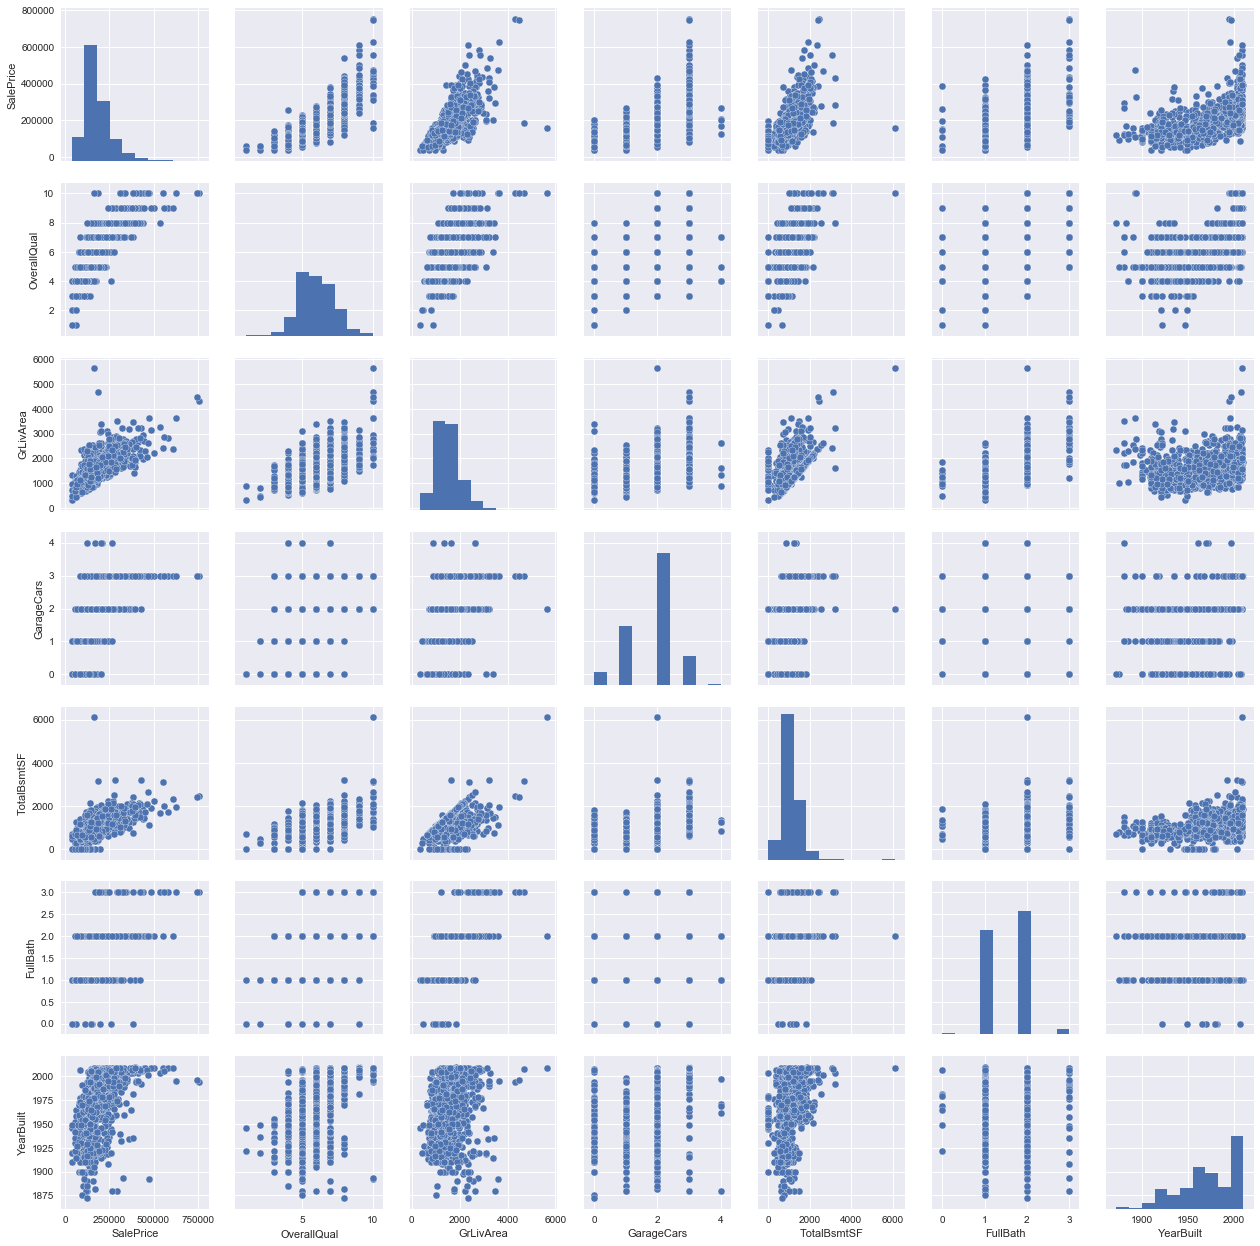

In [82]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dt[cols], size = 2.5)
plt.show();

### Let's check a Missing Data.

In [88]:
total = dt.isnull().sum().sort_values(ascending=False)
percent = (dt.isnull().sum()/dt.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Electrical,1,0.000685
SalePrice,0,0.000000
Heating,0,0.000000
BsmtUnfSF,0,0.000000
BsmtFinSF2,0,0.000000
BsmtFinSF1,0,0.000000
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000


In [89]:
dt = dt.drop((missing_data[missing_data['Total'] > 1]).index,1)
dt = dt.drop(dt.loc[dt['Electrical'].isnull()].index)
dt.isnull().sum().max()  

0

In [90]:
saleprice_scaled = StandardScaler().fit_transform(dt['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Low range values are similar and not too far from 0.
High range values are far from 0 and the 7.something values are really out of range.

### Bivariate analysis

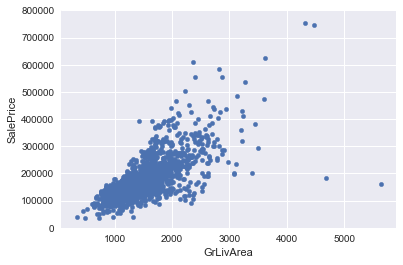

In [91]:
data = pd.concat([dt['SalePrice'], dt['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

In [92]:
dt.sort_values(by = 'GrLivArea', ascending = False)[:2]
dt = dt.drop(dt[dt['Id'] == 1299].index)
dt = dt.drop(dt[dt['Id'] == 524].index)

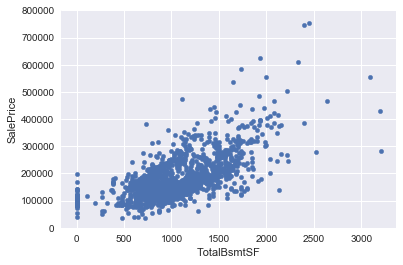

In [93]:
data = pd.concat([dt['SalePrice'], dt['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

### Making a normal distribution.

It was noticed already that a `SalePrice` doesn't have a normal distribution, let's use a log transformation to the data.

In [94]:
dt['SalePrice'] = np.log(dt['SalePrice'])

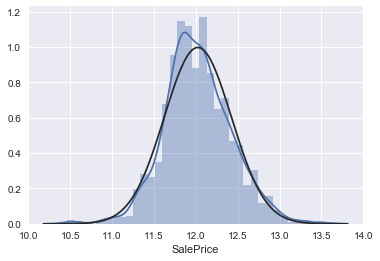

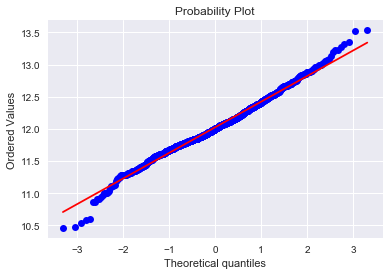

In [95]:
sns.distplot(dt['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(dt['SalePrice'], plot=plt)

Let's check a distribution of `GrLivArea.`

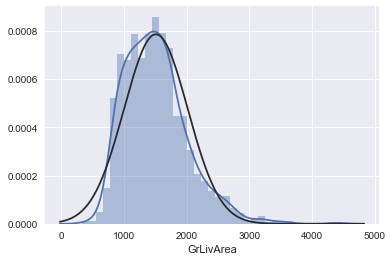

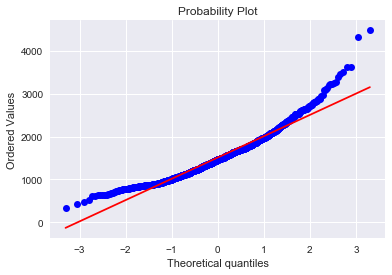

In [96]:
sns.distplot(dt['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(dt['GrLivArea'], plot=plt)

And fix it.

In [97]:
dt['GrLivArea'] = np.log(dt['GrLivArea'])

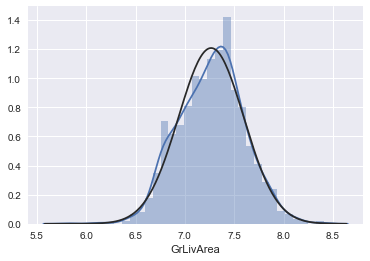

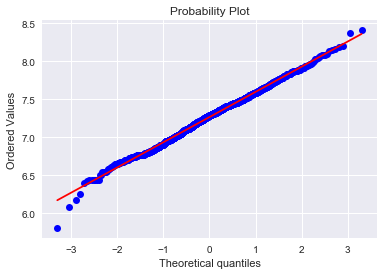

In [98]:
sns.distplot(dt['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(dt['GrLivArea'], plot=plt)

Same for the `TotalBsmtSF`

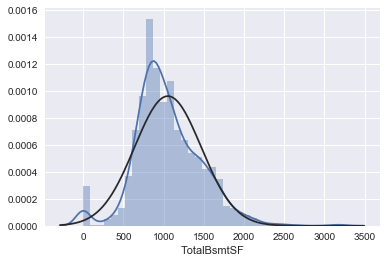

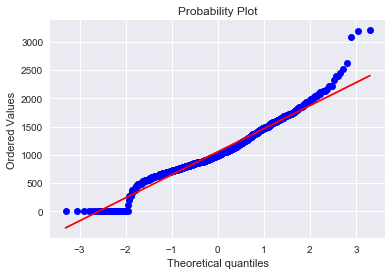

In [99]:
sns.distplot(dt['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(dt['TotalBsmtSF'], plot=plt)

In [100]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
dt['HasBsmt'] = pd.Series(len(dt['TotalBsmtSF']), index=dt.index)
dt['HasBsmt'] = 0 
dt.loc[dt['TotalBsmtSF']>0,'HasBsmt'] = 1

In [101]:
dt.loc[dt['HasBsmt']==1,'TotalBsmtSF'] = np.log(dt['TotalBsmtSF'])

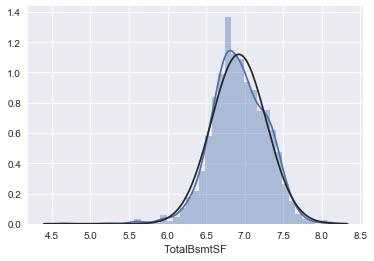

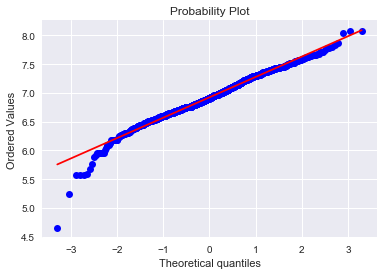

In [102]:
sns.distplot(dt[dt['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(dt[dt['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### Let's use a linear model.

In [147]:
X_train = dt[['GrLivArea','TotalBsmtSF', 'OverallQual', 'YearBuilt']]

In [148]:
Y_train = dt['SalePrice']

In [149]:
def rmse_cv(model, X_Train, y):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [150]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha), X_train, Y_train).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

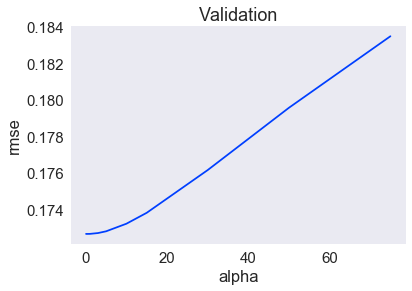

In [151]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [152]:
cv_ridge.min()

0.17267710979200454